# Simulation with Elementary Cellular Automata

We will simulate a one-dimensional universe as a collection of $l$ cells.

In [1]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt

rng = default_rng()

Each location in the universe can either be **on** (1) or **off** (0).

In [2]:
world = [1, 1, 1, 1, 0, 1, 1, 1, 1]

In [3]:
def world_to_string(world_state: list) -> str:
  return "".join("⬜" if s else "⬛" for s in world_state)

In [4]:
world_to_string(world)

'⬜⬜⬜⬜⬛⬜⬜⬜⬜'

> **Side Note**: Here we're borrowing a convention from computer graphics / computer vision where an on/off state refers to maximum brightness (1 => white) or the lack of light (0 => black) when drawing pixels. Sometimes people find this confusing. Imagine you're writing on a chalkboard, and the white squares are the parts you have to draw.

The update rules in our universe apply *locally*: each location $l$ in the universe is only affected by its left and right neighbors.

"Rule 254"

> 🧸 **Question**: *Why is it called rule 254?*

```python
format(254, "08b")
```

In [5]:
rule_254 = {
    (0, 0, 0): 0,
    (0, 0, 1): 0,
    (0, 1, 0): 0,
    (0, 1, 1): 0,
    (1, 0, 0): 0,
    (1, 0, 1): 0,
    (1, 1, 0): 0,
    (1, 1, 1): 1,
}

In [6]:
def make_new_world_state(world_state: list, update_rules: dict) -> list:
  old_world_state = [world_state[-1]] + world_state + [world_state[0]]
  new_world_state = world_state.copy()

  for i, (x, y, z) in enumerate(zip(old_world_state, old_world_state[1:], old_world_state[2:])):
    new_world_state[i] = update_rules[(x, y, z)]

  return new_world_state

In [7]:
world_to_string(make_new_world_state(world, rule_254))

'⬜⬜⬜⬛⬛⬛⬜⬜⬜'

In [8]:
def simulate(initial_state: list, update_rules: dict, iters: int = 10) -> None:
  
  out = np.zeros((iters, len(initial_state)))
  out[0] = initial_state

  world = initial_state

  for i in range(1, iters):
    world = make_new_world_state(world, update_rules)
    out[i] = world

  fig, ax = plt.subplots(figsize=(len(initial_state)/10, iters/10))
  ax.imshow(out, cmap="gray", aspect="equal")
  plt.axis("off")

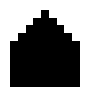

In [9]:
simulate(world, rule_254, iters=10)

In [10]:
def make_rule(number: int) -> dict:
  assert 0 <= number <= 255
  states = ((0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1))
  return {s: int(i) for s, i in zip(states, format(255 - number, "08b"))}

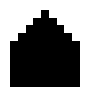

In [11]:
simulate(world, make_rule(254), iters=10)

In [12]:
def world_to_int(world_state: list):
  return sum((2 ** i) * j for i, j in enumerate(world_state))

In [13]:
import networkx as nx

In [14]:
def simulate_periodicity(update_rules: dict, world_size: int = 10, n_starts: int = 5, iters: int = 10) -> None:
  G = nx.DiGraph()

  for _ in range(n_starts):
    # Sample `n_starts` number of worlds

    world = rng.binomial(1, 0.5, size=world_size).tolist()

    # Run each world for `iters` iterations
    for _ in range(iters):

      i = world_to_int(world)
      world = make_new_world_state(world, update_rules)
      j = world_to_int(world)

      G.add_edge(i, j)

  ax = plt.figure(figsize=(15, 10))
  pos = nx.spring_layout(G)
  nx.draw_networkx_nodes(G, pos, node_size=15)
  nx.draw_networkx_edges(G, pos, arrowsize=15, width=0.3)

  plt.axis("off")
  plt.show()

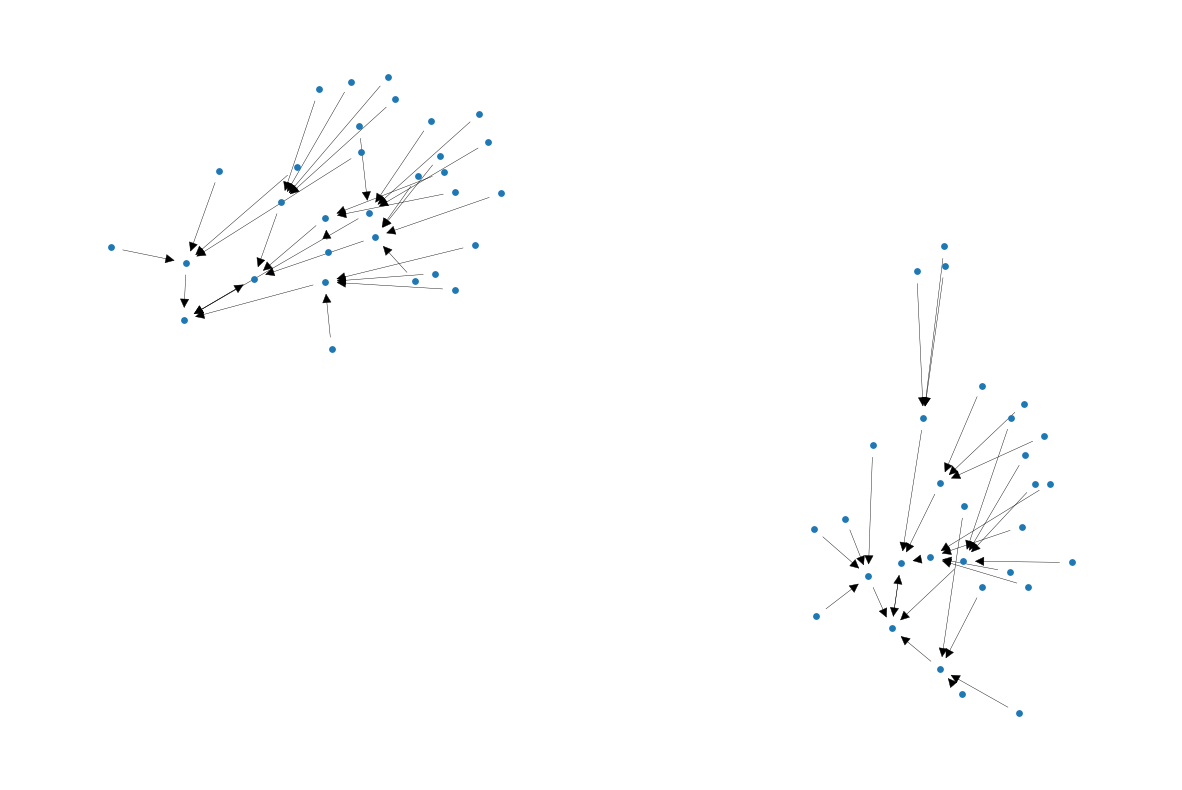

In [15]:
simulate_periodicity(make_rule(105), world_size=6, n_starts=200, iters=200)

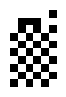

In [16]:
simulate(rng.binomial(1, 0.5, size=6).tolist(), make_rule(105))

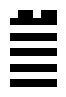

In [17]:
simulate(rng.binomial(1, 0.5, size=6).tolist(), make_rule(105))

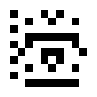

In [18]:
simulate(rng.binomial(1, 0.5, size=10).tolist(), make_rule(105))

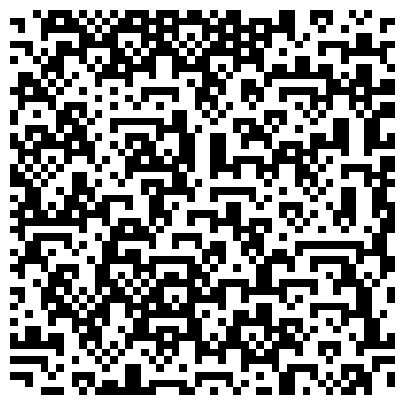

In [19]:
simulate(rng.binomial(1, 0.5, size=50).tolist(), make_rule(105), iters=50)

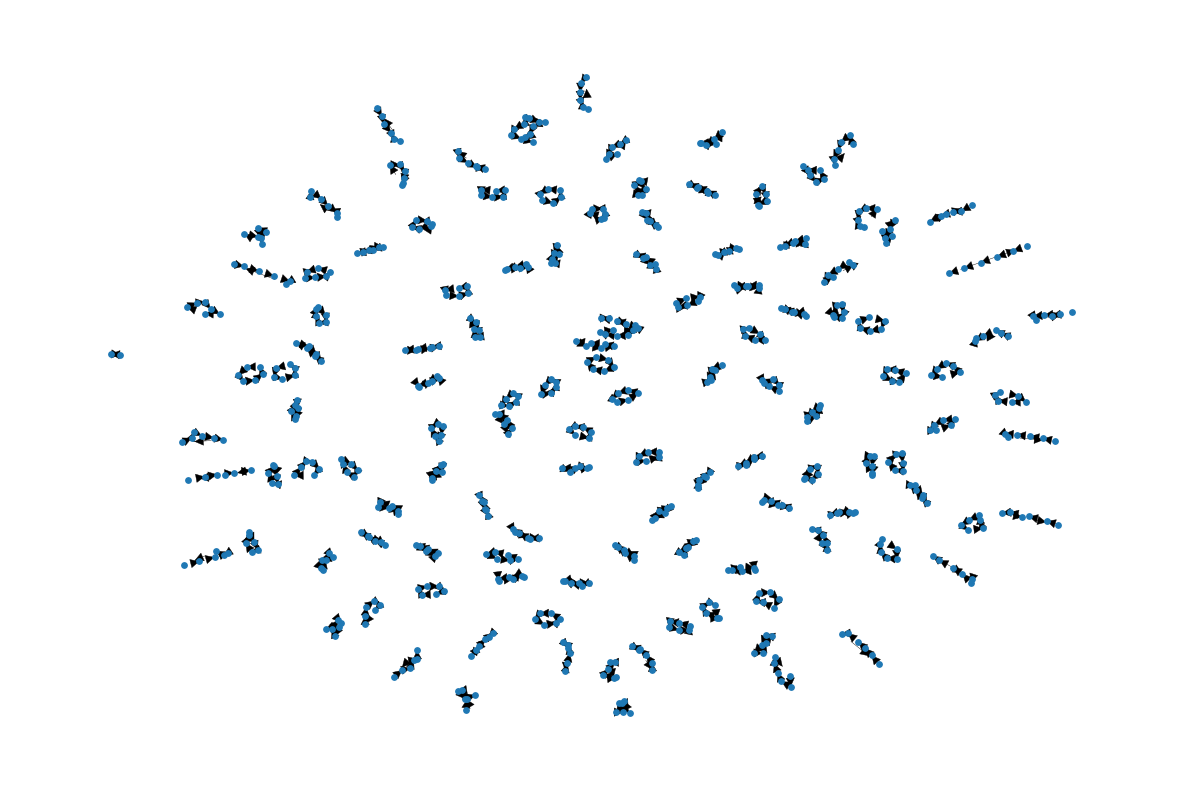

In [20]:
simulate_periodicity(make_rule(105), world_size=10, n_starts=200, iters=200)